## Regression
We will look about linear and logistic regression.

Regression has 2 parts:
1. Simple
2. Multiple

It studies relationship between dependent and independent variables.

It creates lines best suitable for data, minimum distance for each point.

In [2]:
import pandas as pd
from sklearn.datasets import load_iris
iris=load_iris() 
x=iris.data
col_names=iris.feature_names
target_names=iris.target_names
df=pd.DataFrame(data=x,columns=col_names)

In [3]:
#EDA

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df.shape

(150, 4)

<Axes: title={'center': 'Scatter Plot'}, xlabel='petal width (cm)', ylabel='petal length (cm)'>

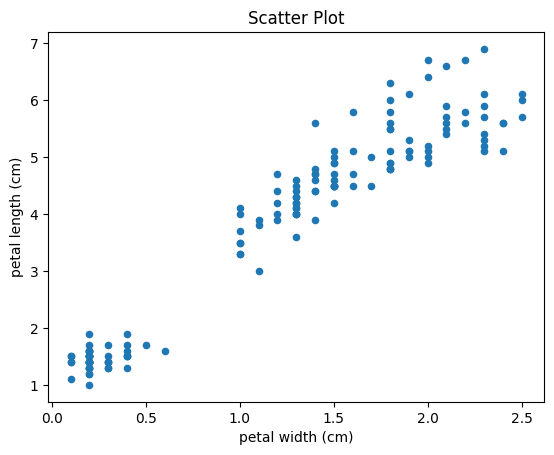

In [10]:
df.plot.scatter(x='petal width (cm)',y='petal length (cm)',title='Scatter Plot')

In [6]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [7]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
# Pre processing
y=df['petal width (cm)'].values.reshape(-1,1)
x=df['petal length (cm)'].values.reshape(-1,1)

In [12]:
# Split data set to training and Test 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2) # 80% for taring and 20% for testing
print(x_train)
print(y_train)

[[3.5]
 [1.4]
 [4.2]
 [4.5]
 [4.9]
 [4.1]
 [1.4]
 [5.3]
 [1.4]
 [5.1]
 [5.9]
 [1.5]
 [1.5]
 [4.3]
 [1.4]
 [4. ]
 [1.7]
 [1.6]
 [1.5]
 [4.5]
 [1.5]
 [4.8]
 [4.5]
 [1.5]
 [5.6]
 [1.2]
 [6.4]
 [6.1]
 [5.9]
 [5.1]
 [1.7]
 [5.2]
 [1.5]
 [3.5]
 [6.1]
 [5.7]
 [3.6]
 [4. ]
 [4.5]
 [6. ]
 [5.1]
 [5.7]
 [4.9]
 [5.6]
 [1.3]
 [4.6]
 [5. ]
 [1.5]
 [5.1]
 [4.5]
 [1.4]
 [5.1]
 [3.9]
 [1.5]
 [5.3]
 [5.6]
 [4.4]
 [4.9]
 [4.1]
 [1.6]
 [1.5]
 [4.9]
 [5.5]
 [1.9]
 [5.6]
 [3.7]
 [5.4]
 [5.8]
 [1.6]
 [4.6]
 [6.7]
 [1.7]
 [1.5]
 [5.5]
 [1. ]
 [4.2]
 [1.5]
 [4.4]
 [1.3]
 [1.2]
 [1.4]
 [4.2]
 [4.7]
 [5.8]
 [1.6]
 [5. ]
 [1.4]
 [4.8]
 [1.4]
 [3.3]
 [4.4]
 [4.7]
 [5.6]
 [5.5]
 [4. ]
 [5.8]
 [4.5]
 [5.7]
 [4.9]
 [1.5]
 [4.7]
 [4.4]
 [5.1]
 [1.4]
 [4.1]
 [3.8]
 [1.7]
 [4. ]
 [5.1]
 [4.8]
 [6.9]
 [6.7]
 [1.6]
 [1.3]
 [4.5]
 [1.4]
 [5.1]
 [6.6]
 [6. ]
 [3.9]]
[[1. ]
 [0.2]
 [1.2]
 [1.6]
 [1.8]
 [1.3]
 [0.2]
 [2.3]
 [0.2]
 [1.9]
 [2.3]
 [0.4]
 [0.4]
 [1.3]
 [0.1]
 [1.3]
 [0.2]
 [0.2]
 [0.2]
 [1.5]
 [0.1]
 [1.4]
 [1.7

In [13]:
# Train model
from sklearn.linear_model import LinearRegression

regressor=LinearRegression()

regressor.fit(x_train,y_train)
print(regressor.intercept_)
print(regressor.coef_)

[-0.36845244]
[[0.4141002]]


In [14]:
#Predictions
score=regressor.predict([[7.5]])
print(score)

[[2.73729907]]


In [17]:
# Writing equation
def calc(slope,intercept,value):
    return intercept+slope*value

In [18]:
score=calc(regressor.coef_,regressor.intercept_,7.5)

In [19]:
score

array([[2.73729907]])

In [23]:
# Testing
# Storing predictions in var, since we have data already
y_pred = regressor.predict(x_test)
df_pref = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_pref)

    Actual  Predicted
0      2.3   1.784869
1      1.8   2.240379
2      1.5   1.370768
3      0.1   0.087058
4      1.6   1.577819
5      1.3   1.412178
6      2.3   1.867689
7      0.2   0.294108
8      1.8   1.619229
9      2.0   1.702049
10     0.3   0.169878
11     0.3   0.252698
12     0.2   0.418338
13     1.2   1.577819
14     0.2   0.211288
15     0.4   0.169878
16     1.9   1.702049
17     0.3   0.211288
18     0.2   0.211288
19     1.4   1.246538
20     1.5   1.494998
21     0.2   0.294108
22     1.1   0.873848
23     2.1   1.950509
24     1.3   1.287948
25     0.3   0.169878
26     1.0   0.998078
27     2.5   2.157559
28     0.2   0.169878
29     1.3   1.536408


In [26]:
# Evaluting Model
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np
mae=mean_absolute_error(y_test,y_pred)
mas=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mas)
print(mae)
print(mas)
print(rmse) 

0.16438033400206045
0.047112043595122076
0.21705308934710438


In [27]:
#MODEL IS WORKING FINE SINCE ERROR IS LESS